##Checkpoint 5 - Código


Ana Julia Glaser            RM:559106

Kaliny Victoria             RM:558770

João Victor de Luna         RM:556462

### A pandemia da COVID-19 afetou todos os cantos do planeta, mas a gravidade do impacto variou entre os países. Nossa análise visa explorar essas diferenças, focando nos países que foram fortemente impactados pela doença.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
path_dead =  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'


dados_paises_covid = pd.read_csv(path)
dados_paises_covid_dead = pd.read_csv(path_dead)

In [ ]:
dados_paises_covid_dead.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

In [ ]:
dados_paises_covid_dead.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [ ]:
dados_paises_covid['Country/Region']

,Country/Region
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola
...,...
284,West Bank and Gaza
285,Winter Olympics 2022
286,Yemen
287,Zambia


##Ajustes no Código

In [ ]:
#Nome das colunas dos dois dataset
dados_paises_covid.rename(columns={"Province/State": "province",
                                   "Country/Region": "country"},
                          inplace=True)

dados_paises_covid_dead.rename(columns={"Province/State": "province",
                                        "Country/Region": "country"},
                               inplace=True)

#Reajuste

dados_paises_covid = dados_paises_covid.melt(id_vars=['province', 'country', 'Lat', 'Long'],
                                             var_name = 'date',
                                             value_name = 'infected')
dados_paises_covid_dead = dados_paises_covid_dead.melt(id_vars=['province', 'country', 'Lat', 'Long'],
                                                       var_name = 'date',
                                                       value_name = 'dead')



In [ ]:
#Vendo o tipo de dado e fazendo as mudanças necessárias
dados_paises_covid_dead.dtypes

,0
province,object
country,object
Lat,float64
Long,float64
date,object
dead,int64


In [ ]:
#Arrumar a data
dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'],
                                            infer_datetime_format='True')
dados_paises_covid_dead['date'] = pd.to_datetime(dados_paises_covid_dead['date'],
                                                 infer_datetime_format='True')

<ipython-input-11-2ff4c1364330>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'],
<ipython-input-11-2ff4c1364330>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'],
<ipython-input-11-2ff4c1364330>:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dados_paises_covid_dead['date'] = p

In [ ]:
#Juntar os dois dataset
dados_covid = pd.merge(dados_paises_covid, dados_paises_covid_dead,
                       on = ['province', 'country',	'Lat',	'Long',	'date'],
                       how = 'inner')



In [ ]:
dados_covid.head()

,province,country,Lat,Long,date,infected,dead
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0


In [ ]:
dados_covid.shape

(330327, 7)

In [ ]:
#Nessa parte vamos ver os nomes dos paises, e retirar os erros
dados_covid['country']

,country
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola
...,...
330322,West Bank and Gaza
330323,Winter Olympics 2022
330324,Yemen
330325,Zambia


Não são paises:

Winter Olympics 2022, West Bank and Gaza, Summer Olympics 2020, MS Zaandam, Holy See e Taiwan.


In [ ]:
# Remover entradas específicas da coluna 'country'
nao_paises = ['Winter Olympics 2022', 'West Bank and Gaza', 'Summer Olympics 2020',
                      'MS Zaandam', 'Holy See', 'Taiwan']
dados_covid_filtrado = dados_covid[~dados_covid['country'].isin(nao_paises)]
print(dados_covid_filtrado)


       province      country        Lat        Long       date  infected  \
0           NaN  Afghanistan  33.939110   67.709953 2020-01-22         0   
1           NaN      Albania  41.153300   20.168300 2020-01-22         0   
2           NaN      Algeria  28.033900    1.659600 2020-01-22         0   
3           NaN      Andorra  42.506300    1.521800 2020-01-22         0   
4           NaN       Angola -11.202700   17.873900 2020-01-22         0   
...         ...          ...        ...         ...        ...       ...   
330320      NaN    Venezuela   6.423800  -66.589700 2023-03-09    552162   
330321      NaN      Vietnam  14.058324  108.277199 2023-03-09  11526994   
330324      NaN        Yemen  15.552727   48.516388 2023-03-09     11945   
330325      NaN       Zambia -13.133897   27.849332 2023-03-09    343135   
330326      NaN     Zimbabwe -19.015438   29.154857 2023-03-09    264276   

         dead  
0           0  
1           0  
2           0  
3           0  
4      

##Análises feitas

**1. Quantidade de paises que estão participando da amostra:** Iniciamos o processo com a coleta de dados de 197 países. No entanto, filtramos dados irrelevantes, removendo entradas como os Jogos Olímpicos e territórios especiais que não representam países inteiros. Após essa limpeza, ficamos com uma base sólida de países que ajudará a conduzir nossas análises.

In [ ]:
paises = []
for i in dados_covid['country']:
  pais = i
  if pais not in paises :
    paises.append(i)



nao_paises =['Winter Olympics 2022', 'West Bank and Gaza', 'Summer Olympics 2020', 'MS Zaandam', 'Holy See']
count = 0
for p in paises:
  count = count + 1
  print(f'{count} {p}')
  if p in nao_paises:
    paises.remove(p)

1 Afghanistan
2 Albania
3 Algeria
4 Andorra
5 Angola
6 Antarctica
7 Antigua and Barbuda
8 Argentina
9 Armenia
10 Australia
11 Austria
12 Azerbaijan
13 Bahamas
14 Bahrain
15 Bangladesh
16 Barbados
17 Belarus
18 Belgium
19 Belize
20 Benin
21 Bhutan
22 Bolivia
23 Bosnia and Herzegovina
24 Botswana
25 Brazil
26 Brunei
27 Bulgaria
28 Burkina Faso
29 Burma
30 Burundi
31 Cabo Verde
32 Cambodia
33 Cameroon
34 Canada
35 Central African Republic
36 Chad
37 Chile
38 China
39 Colombia
40 Comoros
41 Congo (Brazzaville)
42 Congo (Kinshasa)
43 Costa Rica
44 Cote d'Ivoire
45 Croatia
46 Cuba
47 Cyprus
48 Czechia
49 Denmark
50 Diamond Princess
51 Djibouti
52 Dominica
53 Dominican Republic
54 Ecuador
55 Egypt
56 El Salvador
57 Equatorial Guinea
58 Eritrea
59 Estonia
60 Eswatini
61 Ethiopia
62 Fiji
63 Finland
64 France
65 Gabon
66 Gambia
67 Georgia
68 Germany
69 Ghana
70 Greece
71 Grenada
72 Guatemala
73 Guinea
74 Guinea-Bissau
75 Guyana
76 Haiti
77 Holy See
78 Hungary
79 Iceland
80 India
81 Indonesia
82 

In [ ]:
print(f'Existem {len(paises)} paises na lista')

Existem 197 paises na lista


**2. Total de mortos nos países selecionados:** A segunda parte da análise se concentra nas mortes registradas em cinco países-chave: Brasil, EUA, Rússia, Índia e México. Estes países não apenas representam grandes populações, mas também diferentes contextos econômicos, sociais e políticos. Coletamos o número total de infectados e mortes para cada um deles.




In [ ]:
#Brasil
br = dados_covid[dados_covid['country'] == 'Brazil'].tail(1)
infectados_brasil = br['infected'].iloc[-1]
mortes_brasil = br['dead'].iloc[-1]

#USA
us = dados_covid[dados_covid['country'] == 'US'].tail(1)
infectados_us = us['infected'].iloc[-1]
mortes_us = us['dead'].iloc[-1]
russia = dados_covid[dados_covid['country'] == 'Russia'].tail(1)
infectados_russia = russia['infected'].iloc[-1]
mortes_russia = russia['dead'].iloc[-1]

#India
india = dados_covid[dados_covid['country'] == 'India'].tail(1)
infectados_india = india['infected'].iloc[-1]
mortes_india = india['dead'].iloc[-1]

#Mexico
mexico = dados_covid[dados_covid['country'] == 'Mexico'].tail(1)
infectados_mexico = mexico['infected'].iloc[-1]
mortes_mexico = mexico['dead'].iloc[-1]

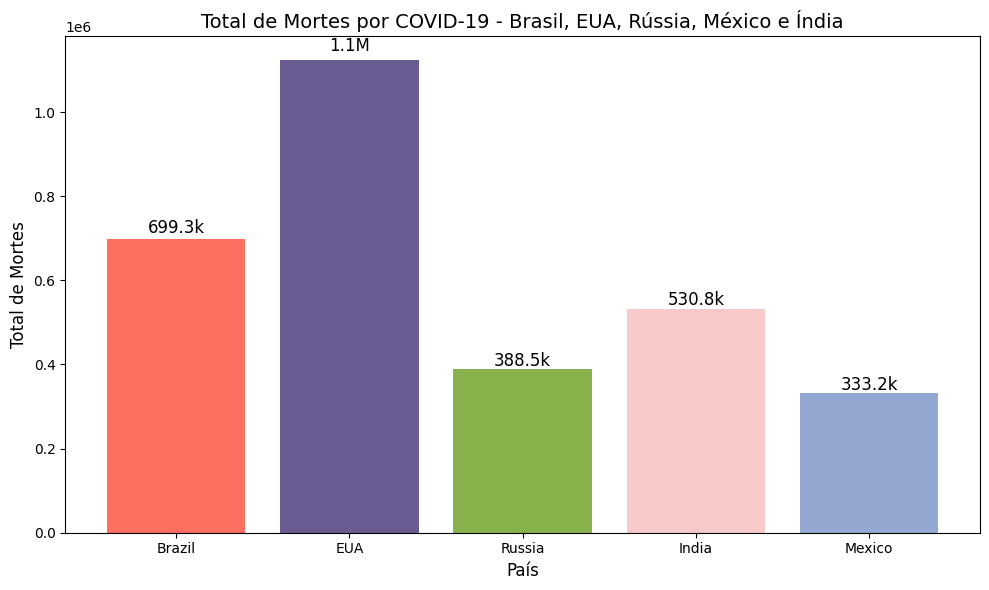

In [ ]:
import matplotlib.pyplot as plt

# Formatando os números em k para milhares e M para milhões
def formatar_numero(numero):
    if numero >= 1_000_000:
        return f'{numero / 1_000_000:.1f}M'
    elif numero >= 1_000:
        return f'{numero / 1_000:.1f}k'
    else:
        return str(numero)


paises = ['Brazil', 'EUA', 'Russia', 'India', 'Mexico']
mortos = [mortes_brasil, mortes_us, mortes_russia, mortes_india, mortes_mexico]
mortos_formatado = [formatar_numero(morto) for morto in mortos]

#Criação do gráfico

plt.figure(figsize=(10, 6))

# Paleta de cores
cores = ['#FF6F61', '#6B5B93', '#88B04B', '#F7CAC9', '#92A8D1']

plt.bar(paises, mortos, color=cores)
plt.title('Total de Mortes por COVID-19 - Brasil, EUA, Rússia, México e Índia', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Total de Mortes', fontsize=12)

for i, morto in enumerate(mortos):
    plt.text(i, morto + (morto * 0.02), mortos_formatado[i], ha='center', fontsize=12)

plt.tight_layout()
plt.show()


**3. Total de Infectados nos paises selecionados:** Além das mortes, o número total de infectados é outro dado essencial para entender a propagação da COVID-19.

Os números de infectados nesses países refletem tanto a capacidade de testagem quanto a gravidade das diferentes fases da pandemia. Ao longo dos últimos anos, essas nações enfrentaram desafios significativos para conter o avanço da doença, que em muitos casos sobrecarregou seus sistemas de saúde.

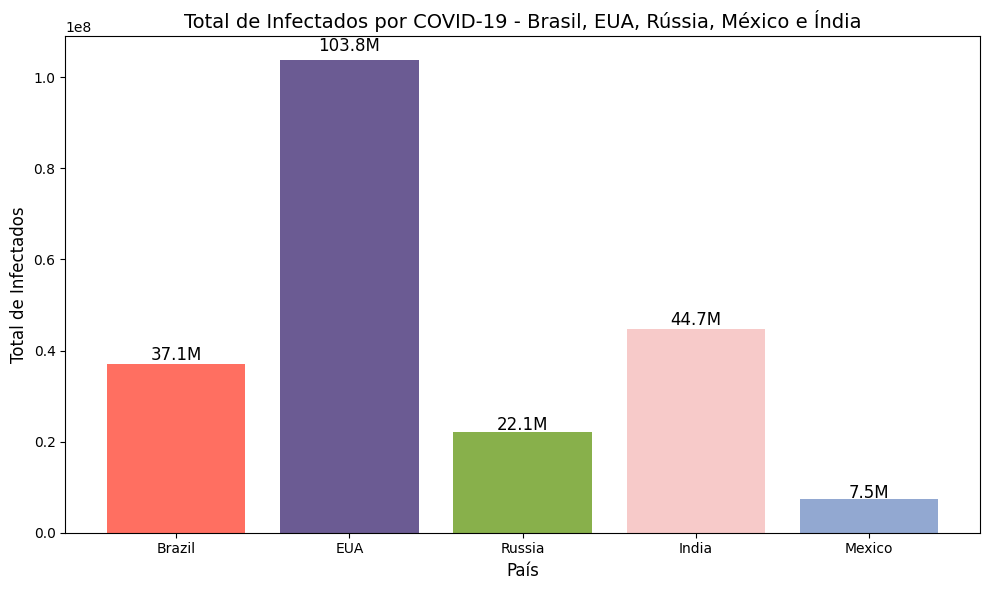

In [ ]:
import matplotlib.pyplot as plt

# Função para formatar os números em k para milhares e M para milhões
def formatar_numero(numero):
    if numero >= 1_000_000:
        return f'{numero / 1_000_000:.1f}M'
    elif numero >= 1_000:
        return f'{numero / 1_000:.1f}k'
    else:
        return str(numero)

# Dados
paises = ['Brazil', 'EUA', 'Russia', 'India', 'Mexico']
infectados = [infectados_brasil, infectados_us, infectados_russia, infectados_india, infectados_mexico]

infectados_formatado = [formatar_numero(infectado) for infectado in infectados]

# Criação do gráfico
plt.figure(figsize=(10, 6))

# cores
cores = ['#FF6F61', '#6B5B93', '#88B04B', '#F7CAC9', '#92A8D1']

plt.bar(paises, infectados, color=cores)

plt.title('Total de Infectados por COVID-19 - Brasil, EUA, Rússia, México e Índia', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Total de Infectados', fontsize=12)

for i, infectado in enumerate(infectados):
    plt.text(i, infectado + (infectado * 0.02), infectados_formatado[i], ha='center', fontsize=12)

plt.tight_layout()
plt.show()

**4. Paises com maiores infectados e número de mortos:** Na quarta parte da análise, focamos nos países com maiores números de infectados e mortos por COVID-19 até a data de 9 de março de 2023. A visualização desses dados permite uma comparação mais detalhada de como a pandemia impactou de forma devastadora diferentes regiões ao redor do mundo.

In [ ]:
ultima_data = dados_covid[dados_covid['date'] == '2023-03-09']
mais_infectados = ultima_data.drop_duplicates('country').nlargest(10, 'infected')
mais_mortes = ultima_data.drop_duplicates('country').nlargest(10, 'dead')

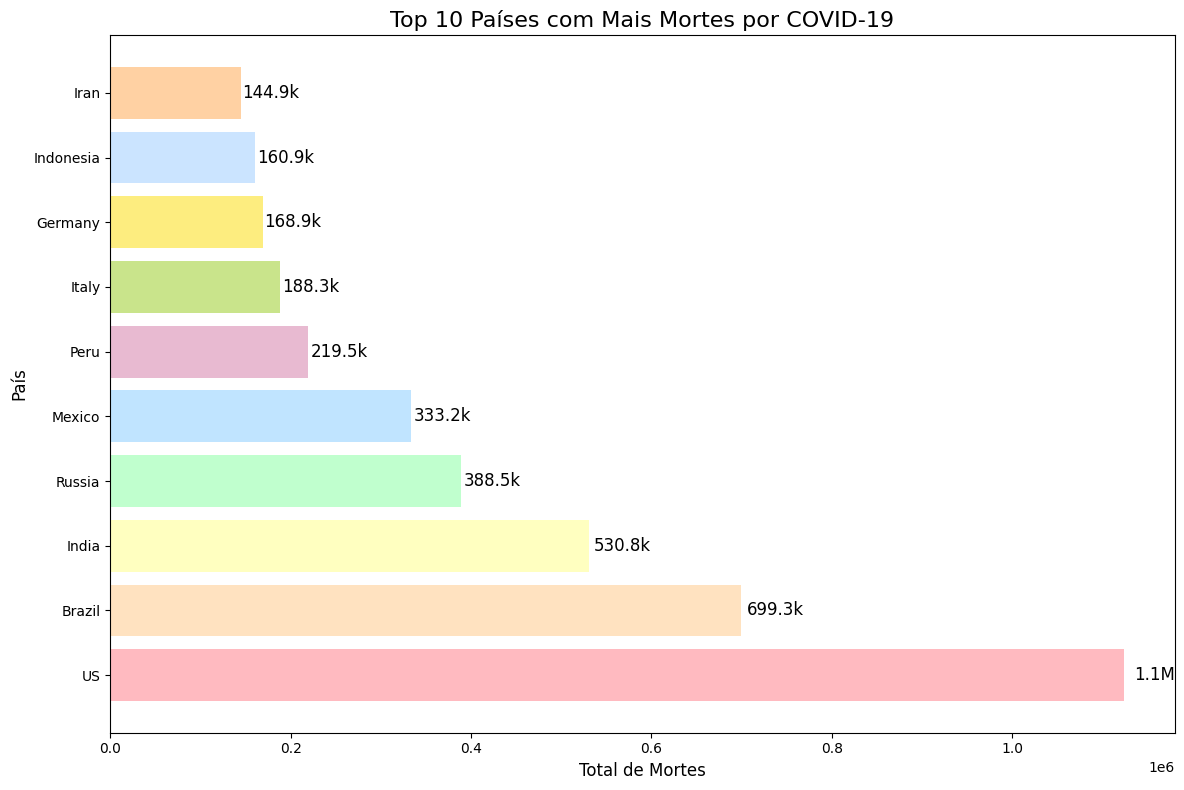

In [ ]:
import matplotlib.pyplot as plt

# Função para formatar os números em k para milhares e M para milhões
def formatar_numero(numero):
    if numero >= 1_000_000:
        return f'{numero / 1_000_000:.1f}M'
    elif numero >= 1_000:
        return f'{numero / 1_000:.1f}k'
    else:
        return str(numero)

paises = mais_mortes['country']
mortes = mais_mortes['dead']

mortes_formatado = [formatar_numero(morte) for morte in mortes]

cores_claras = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF',
                '#E6B3CC', '#C4E17F', '#FDEB71', '#C6E2FF', '#FFCC99']

#criacao do grafico
plt.figure(figsize=(12,8))
plt.barh(paises, mortes, color=cores_claras, alpha=0.9)

plt.title('Top 10 Países com Mais Mortes por COVID-19', fontsize=16)
plt.xlabel('Total de Mortes', fontsize=12)
plt.ylabel('País', fontsize=12)

for i, morte in enumerate(mortes):
    plt.text(morte + (morte * 0.01), i, mortes_formatado[i], va='center', fontsize=12)

plt.tight_layout()
plt.show()


O gráfico utiliza uma paleta de cores suaves para representar cada país de maneira distinta e visualmente clara. Cada barra representa o total de mortos em cada país, com os números exatos exibidos ao lado para fácil comparação. O layout ajustado e as cores escolhidas fornecem uma visualização limpa e informativa.

Essa análise evidencia a diferença de impacto em cada região, ajudando a entender o contexto global da pandemia e suas consequências devastadoras, que ainda são sentidas até os dias de hoje.

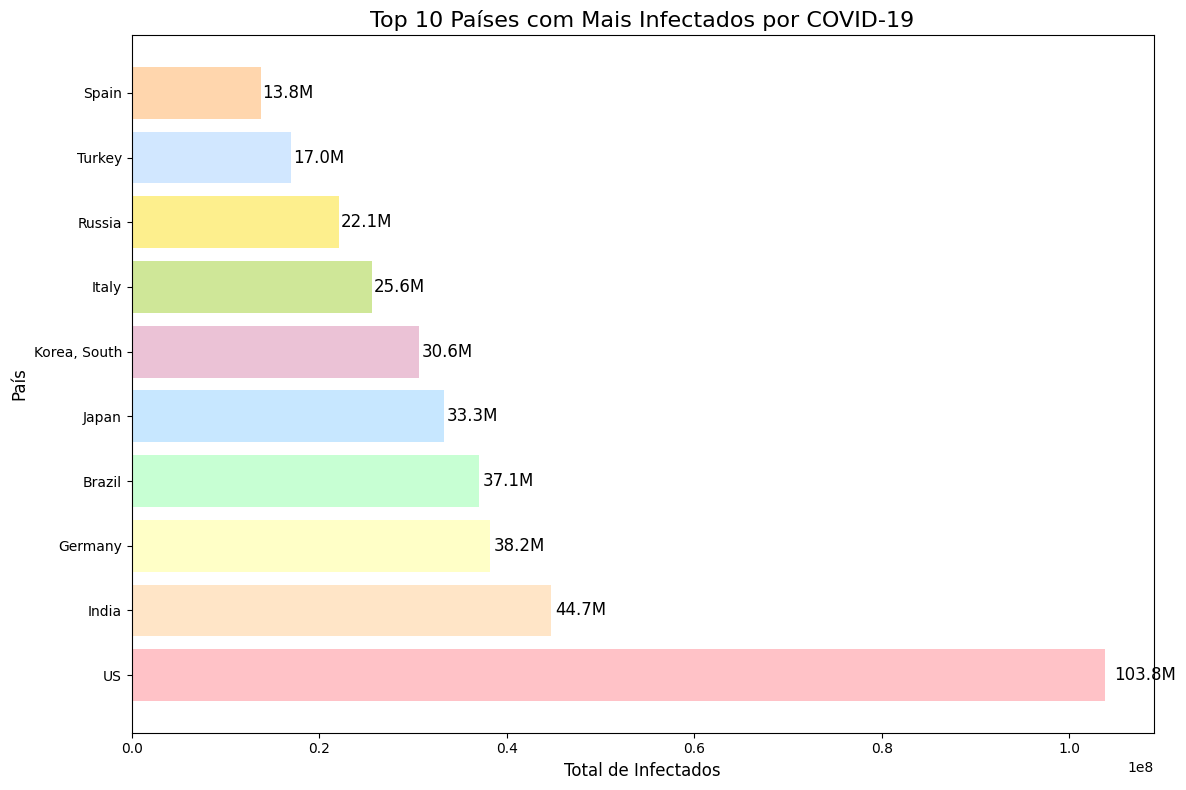

In [ ]:
import matplotlib.pyplot as plt

# Função para formatar os números em k para milhares e M para milhões
def formatar_numero(numero):
    if numero >= 1_000_000:
        return f'{numero / 1_000_000:.1f}M'
    elif numero >= 1_000:
        return f'{numero / 1_000:.1f}k'
    else:
        return str(numero)

paises = mais_infectados['country']
infectados = mais_infectados['infected']

infectados_formatado = [formatar_numero(infectado) for infectado in infectados]

cores_claras = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF',
                '#E6B3CC', '#C4E17F', '#FDEB71', '#C6E2FF', '#FFCC99']

plt.figure(figsize=(12, 8))
plt.barh(paises, infectados, color=cores_claras, alpha=0.8)

plt.title('Top 10 Países com Mais Infectados por COVID-19', fontsize=16)
plt.xlabel('Total de Infectados', fontsize=12)
plt.ylabel('País', fontsize=12)

for i, infectado in enumerate(infectados):
    plt.text(infectado + (infectado * 0.01), i, infectados_formatado[i], va='center', fontsize=12)

plt.tight_layout()
plt.show()


**5. Evolução dos Casos dos dois paises com mais infectados - EUA e India:** Na quinta parte da análise, apresentamos a evolução dos casos dos dois países com mais infectados por COVID-19: Estados Unidos e Índia.

A linha do tempo exibida no gráfico reflete a evolução dos casos de COVID-19 nesses dois países desde o início da pandemia até março de 2023. Utilizamos 11 pontos de referência ao longo do período para destacar o crescimento dos números de infectados de forma clara e visual.

* Estados Unidos: O país teve um aumento constante e acelerado de casos, ultrapassando a marca de 100 milhões de infectados até o início de 2023. Isso reflete o impacto da pandemia em um país com grande população e diversidade regional, além de períodos com diferentes abordagens de contenção e vacinação.

* Índia: Embora a Índia também tenha registrado um crescimento significativo, com um pico em torno de 44 milhões de infectados, o ritmo de aumento desacelerou em 2022, especialmente após a vacinação em massa e a introdução de medidas mais rigorosas de contenção.

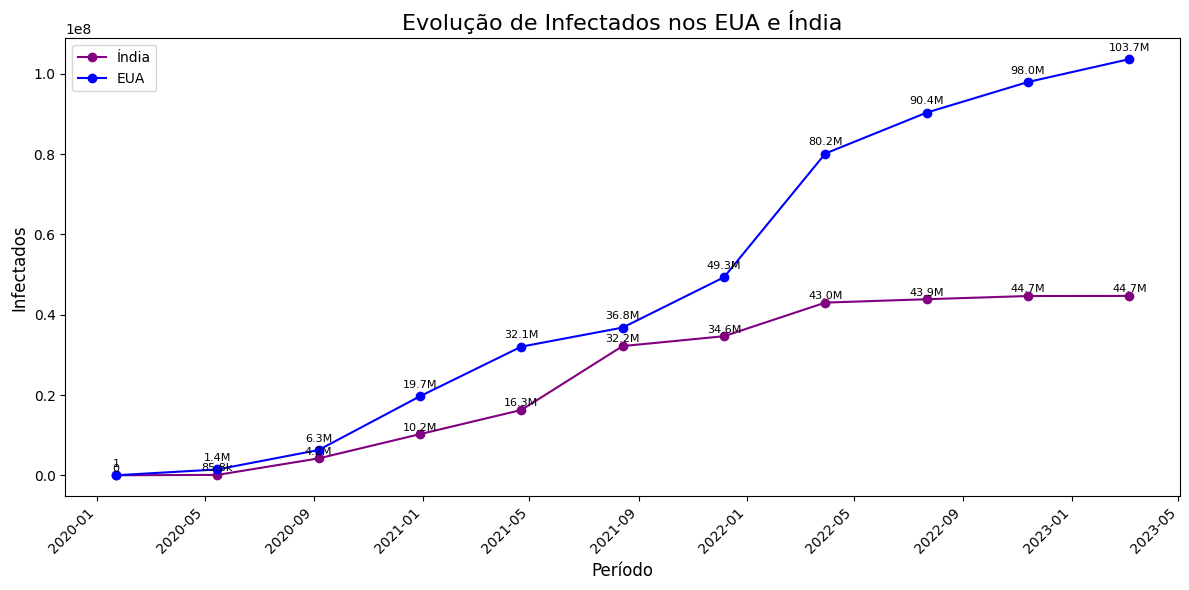

In [ ]:

import matplotlib.pyplot as plt

# Filtrar os dados de evolução
evolucao_india = dados_covid[dados_covid['country'] == 'India']
evolucao_EUA = dados_covid[dados_covid['country'] == 'US']

periodos = evolucao_india['date'][::len(evolucao_india) // 10].tolist()  # 10 intervalos, então 11 pontos
if len(periodos) < 11:
    periodos.append(evolucao_india['date'].iloc[-1])  # Adiciona a última data se não estiver na lista

evolucao_india_filtrada = evolucao_india[evolucao_india['date'].isin(periodos)]
evolucao_EUA_filtrada = evolucao_EUA[evolucao_EUA['date'].isin(periodos)]

plt.figure(figsize=(12, 6))

plt.plot(evolucao_india_filtrada['date'], evolucao_india_filtrada['infected'], label='Índia', marker='o', color='purple')
plt.plot(evolucao_EUA_filtrada['date'], evolucao_EUA_filtrada['infected'], label='EUA', marker='o', color='blue')

def formatar_numero(numero):
    if numero >= 1_000_000:
        return f'{numero / 1_000_000:.1f}M'
    elif numero >= 1_000:
        return f'{numero / 1_000:.1f}k'
    else:
        return str(numero)

for i in range(len(evolucao_india_filtrada)):
    plt.text(evolucao_india_filtrada['date'].iloc[i], evolucao_india_filtrada['infected'].iloc[i] + 0.02 * max(evolucao_india_filtrada['infected']),
             formatar_numero(evolucao_india_filtrada['infected'].iloc[i]), fontsize=8, ha='center')

for i in range(len(evolucao_EUA_filtrada)):
    plt.text(evolucao_EUA_filtrada['date'].iloc[i], evolucao_EUA_filtrada['infected'].iloc[i] + 0.02 * max(evolucao_EUA_filtrada['infected']),
             formatar_numero(evolucao_EUA_filtrada['infected'].iloc[i]), fontsize=8, ha='center')

plt.xticks(rotation=45, ha='right')

plt.title('Evolução de Infectados nos EUA e Índia', fontsize=16)
plt.ylabel('Infectados', fontsize=12)
plt.xlabel('Período', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()


**6. Evolução dos dois paises com mais mortos pelo Covid-19 - Brasil e USA:** O gráfico de linhas acima ilustra a evolução do número total de mortes por COVID-19 nesses dois países ao longo de um período que vai desde o início da pandemia até março de 2023.

* Estados Unidos: O país registrou um aumento expressivo no número de mortes, ultrapassando a marca de 1,1 milhão de mortes até o início de 2023. A curva de mortalidade tem um crescimento acelerado especialmente até 2022, refletindo o impacto de várias ondas da pandemia.

* Brasil: O Brasil, embora com um número de mortes também elevado, teve uma evolução mais estável após o pico inicial, alcançando cerca de 699 mil mortes até março de 2023. A trajetória de crescimento foi mais uniforme em comparação com os EUA, e a estabilização nos números ocorreu um pouco antes.

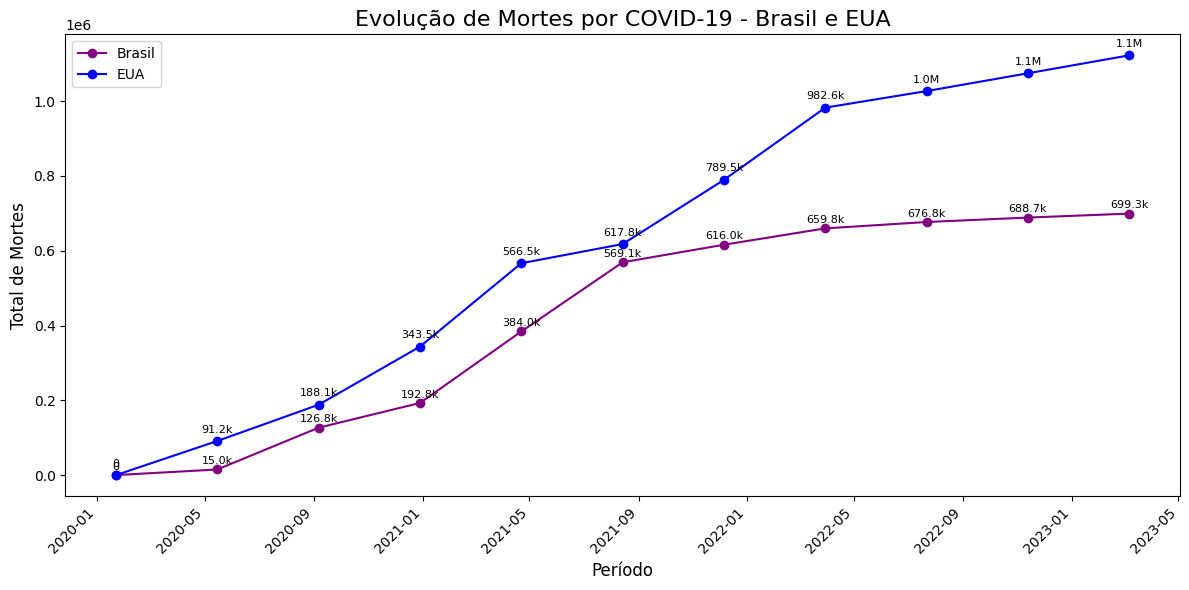

In [ ]:
import matplotlib.pyplot as plt

evolucao_brasil = dados_covid[dados_covid['country'] == 'Brazil']
evolucao_EUA = dados_covid[dados_covid['country'] == 'US']

periodos = evolucao_brasil['date'][::len(evolucao_brasil) // 10].tolist()
if len(periodos) < 11:
    periodos.append(evolucao_brasil['date'].iloc[-1])

evolucao_brasil_filtrada = evolucao_brasil[evolucao_brasil['date'].isin(periodos)]
evolucao_EUA_filtrada = evolucao_EUA[evolucao_EUA['date'].isin(periodos)]

# Criar o gráfico
plt.figure(figsize=(12, 6))

plt.plot(evolucao_brasil_filtrada['date'], evolucao_brasil_filtrada['dead'], label='Brasil', marker='o', color='purple')
plt.plot(evolucao_EUA_filtrada['date'], evolucao_EUA_filtrada['dead'], label='EUA', marker='o', color='blue')

# Função para formatar os números em k para milhares e M para milhões
def formatar_numero(numero):
    if numero >= 1_000_000:
        return f'{numero / 1_000_000:.1f}M'
    elif numero >= 1_000:
        return f'{numero / 1_000:.1f}k'
    else:
        return str(numero)

for i in range(len(evolucao_brasil_filtrada)):
    plt.text(evolucao_brasil_filtrada['date'].iloc[i], evolucao_brasil_filtrada['dead'].iloc[i] + 0.02 * max(evolucao_brasil_filtrada['dead']),
             formatar_numero(evolucao_brasil_filtrada['dead'].iloc[i]), fontsize=8, ha='center')

for i in range(len(evolucao_EUA_filtrada)):
    plt.text(evolucao_EUA_filtrada['date'].iloc[i], evolucao_EUA_filtrada['dead'].iloc[i] + 0.02 * max(evolucao_EUA_filtrada['dead']),
             formatar_numero(evolucao_EUA_filtrada['dead'].iloc[i]), fontsize=8, ha='center')

plt.xticks(rotation=45, ha='right')

plt.title('Evolução de Mortes por COVID-19 - Brasil e EUA', fontsize=16)
plt.ylabel('Total de Mortes', fontsize=12)
plt.xlabel('Período', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

